In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [3]:
sentinels = {'PRECIP': ['Nulo'], 'EVAP': ['Nulo'], 'TMAX': ['Nulo'],'TMIN': ['Nulo']}

In [4]:
datos_df = pd.read_csv("cajeme.txt",skiprows=0, sep='\s+',na_values=sentinels)

In [5]:
df = pd.DataFrame(datos_df)

In [6]:
df['FECHAN'] = pd.to_datetime(df.apply(lambda x: x['FECHA'], 1), dayfirst=True)
df = df.drop(['FECHA'], 1)

In [7]:
df.dtypes

PRECIP           float64
EVAP             float64
TMAX             float64
TMIN             float64
FECHAN    datetime64[ns]
dtype: object

In [8]:
df.describe()

,PRECIP,EVAP,TMAX,TMIN
count,10531.000000,7324.000000,10503.000000,10514.000000
mean,0.894511,5.814091,32.601047,14.880873
std,5.948456,2.431426,5.770682,6.881583
min,0.000000,0.200000,13.000000,-2.500000
25%,0.000000,3.900000,28.000000,9.000000
50%,0.000000,5.500000,33.000000,13.000000
75%,0.000000,7.600000,37.500000,22.000000
max,184.500000,14.900000,47.500000,29.000000


In [9]:
df['MES'] = df['FECHAN'].dt.month
df['AÑO'] = df['FECHAN'].dt.year

In [10]:
df.describe()

,PRECIP,EVAP,TMAX,TMIN,MES,AÑO
count,10531.000000,7324.000000,10503.000000,10514.000000,10531.000000,10531.000000
mean,0.894511,5.814091,32.601047,14.880873,6.433102,1996.528915
std,5.948456,2.431426,5.770682,6.881583,3.503432,9.128480
min,0.000000,0.200000,13.000000,-2.500000,1.000000,1980.000000
25%,0.000000,3.900000,28.000000,9.000000,3.000000,1990.000000
50%,0.000000,5.500000,33.000000,13.000000,6.000000,1997.000000
75%,0.000000,7.600000,37.500000,22.000000,10.000000,2004.000000
max,184.500000,14.900000,47.500000,29.000000,12.000000,2011.000000


In [11]:
df.head()

,PRECIP,EVAP,TMAX,TMIN,FECHAN,MES,AÑO
0,0.0,1.2,25.0,7.0,1980-01-01,1,1980
1,0.0,1.7,22.0,8.0,1980-01-02,1,1980
2,0.0,1.9,25.0,9.0,1980-01-03,1,1980
3,0.0,1.8,26.0,6.0,1980-01-04,1,1980
4,0.0,2.0,26.0,4.0,1980-01-05,1,1980


In [12]:
#Para el número de años
NumA = len(df['AÑO'].unique())

In [13]:
#Creando arreglo de meses y promedio de datos mensual
init = 1
MESES = [init + i for i in range(0, 12)]
PRECIPMESPROM = [df[df.MES==(init + i)].PRECIP.sum()/NumA for i in range (0,12)]
TMAXMESPROM = [df[df.MES==(init + i)].TMAX.mean() for i in range (0,12)]
TMINMESPROM = [df[df.MES==(init + i)].TMIN.mean() for i in range (0,12)]

In [14]:
#Creando dataframe para promedios mensuales
datos_mensual = {'MES': MESES, 'PRECIPPROM': PRECIPMESPROM, 'TMAXPROM': TMAXMESPROM, 'TMINPROM': TMINMESPROM}
df_mensual = pd.DataFrame(data=datos_mensual)
df_mensual

,MES,PRECIPPROM,TMAXPROM,TMINPROM
0,1,24.140625,25.384577,7.488407
1,2,10.696875,26.821084,8.010216
2,3,2.359375,29.330208,8.960458
3,4,1.493750,32.628308,11.103448
4,5,0.584375,35.624851,14.390681
5,6,3.484375,38.114710,20.225309
6,7,60.290625,38.273653,24.048984
7,8,66.834375,38.229527,24.323733
8,9,76.212500,37.452819,23.237356
9,10,21.475000,35.120824,18.449944


In [15]:
#Creando arreglo de años y promedio de datos anuales
init = 1980
AÑOS = [init + i for i in range(0, 32)]
PRECIPANUALPROM = [df[df.AÑO==(init + i)].PRECIP.mean() for i in range (0,32)]
TMAXANUALPROM = [df[df.AÑO==(init + i)].TMAX.mean() for i in range (0,32)]
TMINANUALPROM = [df[df.AÑO==(init + i)].TMIN.mean() for i in range (0,32)]

In [16]:
#Creando dataframe para promedios anuales
datos_anual = {'AÑO': AÑOS, 'PRECIPPROM': PRECIPANUALPROM, 'TMAXPROM': TMAXANUALPROM, 'TMINPROM': TMINANUALPROM}
df_anual = pd.DataFrame(data=datos_anual)
df_anual

,AÑO,PRECIPPROM,TMAXPROM,TMINPROM
0,1980,0.498634,31.431694,16.181694
1,1981,1.308219,31.073973,16.008219
2,1982,0.595890,31.394521,14.813699
3,1983,0.770833,27.158333,8.800000
4,1984,2.107273,30.625455,15.483636
5,1985,0.711538,27.049451,9.313187
6,1986,0.669421,31.731405,14.409091
7,1987,0.481633,31.702041,13.469388
8,1988,0.331148,32.093333,12.581395
9,1989,0.451613,22.193548,4.548387


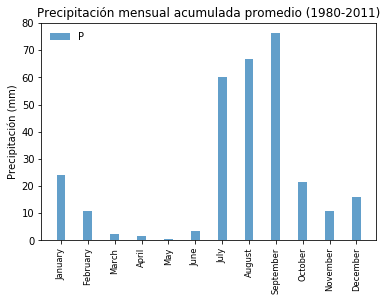

In [17]:
#Realizamos una gráfica de barras de la precipitación mensual acumulada promedio  
MESESc = calendar.month_name[1:13] 
fecha = MESES
PRECIPMENSUAL = PRECIPMESPROM

#Calculando anchura óptima
width = np.min(np.diff(fecha))/3

#Graficando
plt.bar(fecha-width, PRECIPMENSUAL,width,align='center', alpha=0.7)
plt.xticks(fecha-width, MESESc, size = 'small', color = 'k', rotation = 90)
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación mensual acumulada promedio (1980-2011)')
plt.gca().legend(('PMENSUAL'),frameon=False,loc='upper left')
plt.savefig('precipromensual',plt=2000)
plt.show()

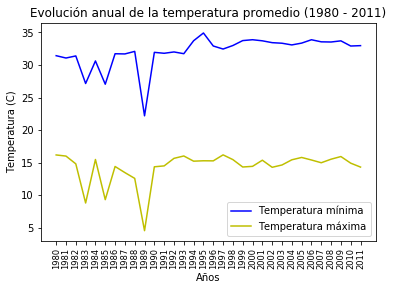

In [18]:
#Realizamos una gráfica que demuestre la temperatura máxima y mínima promedio a través del tiempo
X = AÑOS
N = np.arange(len(X)) #Longitud del arreglo de datos
Y1 = TMAXANUALPROM
Y2 = TMINANUALPROM

plt.plot(Y1, label="Temperatura mínima", color = 'b')
plt.xlabel("Años")
plt.ylabel("Temperatura (C)")


plt.xticks(N, X, size = 'small',color = 'k',rotation = 90)


plt.plot(Y2, label="Temperatura máxima", color = 'y')
plt.legend()
plt.title('Evolución anual de la temperatura promedio (1980 - 2011)')
plt.savefig('tempanual',plt=2000)
plt.show()

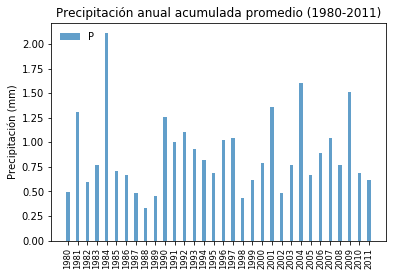

In [19]:

#Realizamos una gráfica de barras de la precipitación anual acumulada promedio  
fecha = AÑOS
PRECIPANUAL = PRECIPANUALPROM

#Calculando anchura óptima
width = np.min(np.diff(fecha))/3

#Graficando
plt.bar(fecha-width, PRECIPANUAL,width,align='center', alpha=0.7)
plt.xticks(fecha-width, AÑOS, size = 'small', color = 'k', rotation = 90)
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación anual acumulada promedio (1980-2011)')
plt.gca().legend(('PMANUAL'),frameon=False,loc='upper left')
plt.savefig('precipromanual',plt=2000)
plt.show()

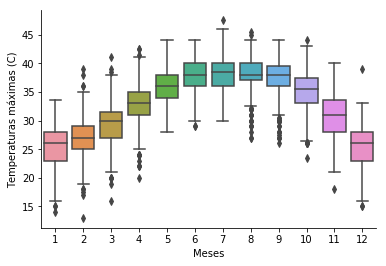

In [20]:
#Realizamos el diagrama de cajas para las temperaturas máximas de cada mes con seaborn
ax = sns.boxplot(x="MES", y="TMAX", data=df)
ax.set(xlabel='Meses', ylabel='Temperaturas máximas (C)')
sns.despine() #Remueve la "espina dorsal" de los ejes
plt.savefig('cajatmaxmensualsns',plt=2000) #Guardamos la figura
plt.show()

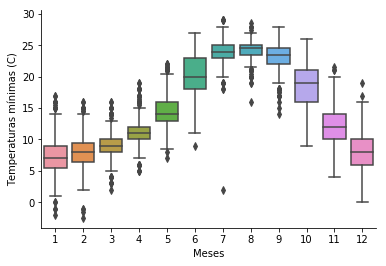

In [21]:
#Realizamos el diagrama de cajas para las temperaturas mínimas de cada mes con seaborn
ax = sns.boxplot(x="MES", y="TMIN", data=df)
ax.set(xlabel='Meses', ylabel='Temperaturas mínimas (C)')
sns.despine() #Remueve la "espina dorsal" de los ejes
plt.savefig('cajatminmensualsns',plt=2000) #Guardamos la figura
plt.show()

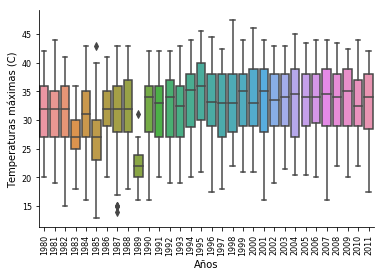

In [22]:
#Realizamos el diagrama de cajas para las temperaturas máximas de cada año
ax = sns.boxplot(x="AÑO", y="TMAX", data=df)
ax.set(xlabel='Años', ylabel='Temperaturas máximas (C)')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90) #Rotamos los datos 90 grados para mejor visualización
ax.tick_params(labelsize=8)  #Tamaño de fuente de datos en los ejes
sns.despine() #Remueve la "espina dorsal" de los ejes
plt.savefig('cajatmaxanual',plt=2000) #Guardamos la figura
plt.show()

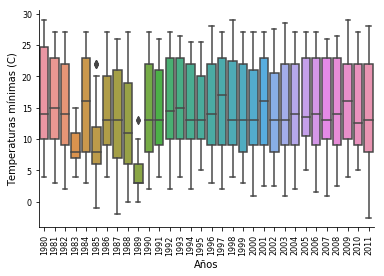

In [23]:
#Realizamos el diagrama de cajas para las temperaturas mínimas de cada año con seaborn
ax = sns.boxplot(x="AÑO", y="TMIN", data=df)
ax.set(xlabel='Años', ylabel='Temperaturas mínimas (C)')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90) #Rotamos los datos 90 grados para mejor visualización
ax.tick_params(labelsize=8)  #Tamaño de fuente de datos en los ejes
sns.despine() #Remueve la "espina dorsal" de los ejes
plt.savefig('cajatminanualsns',plt=2000) #Guardamos la figura
plt.show()

In [24]:
data_to_plotene = [df[df.MES==1].TMAX,df[df.MES==1].TMIN]

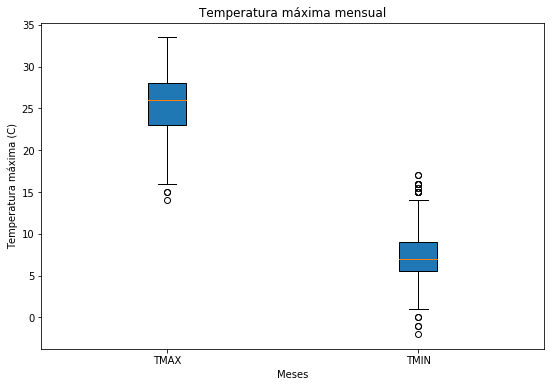

In [27]:

# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Set labels
labels = ['TMAX','TMIN']

# Create the boxplot
bp = ax.boxplot(data_to_plotene,
                vert=True,  # vertical box alignment
                patch_artist=True,  # fill with color
                labels=labels)

#Set axis labels
ax.set_title('Temperatura máxima mensual')
ax.set_xlabel('Meses')
ax.set_ylabel('Temperatura máxima (C)')
        
# Save the figure
fig.savefig('cajastmaxmeses.png', bbox_inches='tight')

plt.show()

In [28]:
data_to_plot = [df[df.MES==1].TMAX, df[df.MES==2].TMAX, df[df.MES==3].TMAX, df[df.MES==4].TMAX, df[df.MES==5].TMAX,df[df.MES==6].TMAX, df[df.MES==7].TMAX, df[df.MES==8].TMAX, df[df.MES==9].TMAX, df[df.MES==10].TMAX,df[df.MES==11].TMAX, df[df.MES==12].TMAX]

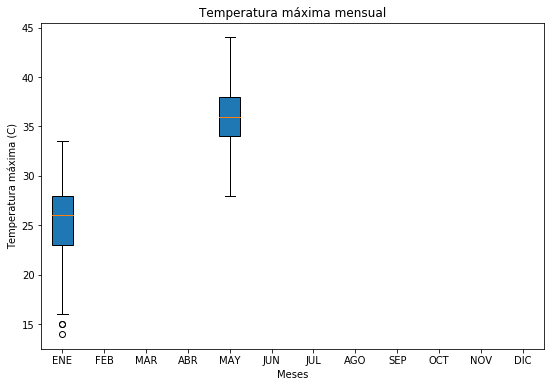

In [31]:
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Set labels
labels = ['ENE','FEB','MAR','ABR','MAY','JUN','JUL','AGO','SEP','OCT','NOV','DIC']

# Create the boxplot
bp = ax.boxplot(data_to_plot,
                vert=True,  # vertical box alignment
                patch_artist=True,  # fill with color
                labels=labels)

#Set axis labels
ax.set_title('Temperatura máxima mensual')
ax.set_xlabel('Meses')
ax.set_ylabel('Temperatura máxima (C)')
        
# Save the figure
fig.savefig('cajastmaxmeses.png', bbox_inches='tight')

plt.show()